In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.random import randint, choice
import os

In [2]:
def gen_stimuli(num_item, dis_stim, tar_stim):
    obj_size = line_height + border
    pos_err = int((feature_size-obj_size)*deg2px)
    
    stim_img = np.uint8(255*np.ones((int(view_area*deg2px), int(view_area*deg2px))))
    tar_img = np.uint8(255*np.ones((int(obj_size*deg2px), int(obj_size*deg2px))))
    gt_img = np.uint8(0*np.ones((int(view_area*deg2px), int(view_area*deg2px))))
    
    idxs = choice(grid_x*grid_y, num_item, replace=False)
    tar_idx_pos = randint(num_item) 

    for i in range(num_item):
        pos_y = int(idxs[i]/grid_x)*int(feature_size*deg2px) + randint(pos_err)
        pos_x = (idxs[i]%grid_y)*int(feature_size*deg2px) + randint(pos_err)
        
        gt_pos_y = int(idxs[i]/grid_x)*int(feature_size*deg2px)
        gt_pos_x = (idxs[i]%grid_y)*int(feature_size*deg2px) 
        
        if idxs[i] == idxs[tar_idx_pos]:
            tar_img = tar_stim[randint(len(tar_stim))]
            stim_img[pos_y:pos_y+tar_img.shape[0], pos_x:pos_x+tar_img.shape[1]] = tar_img
            gt_img[gt_pos_y:gt_pos_y+int(feature_size*deg2px), gt_pos_x:gt_pos_x+int(feature_size*deg2px)] = 255
        else:
            temp = dis_stim[randint(len(dis_stim))]
            stim_img[pos_y:pos_y+temp.shape[0], pos_x:pos_x+temp.shape[1]] = temp
                
    return stim_img, tar_img, gt_img

deg2px = 30

view_area = 20.5 #in degress
grid_x, grid_y = 3, 3

feature_size = view_area/grid_x #in degress

line_height = 5.5 #in degress
line_width = 5.5 #in degress
line_weight = 0.55 #in degrees
border = 0.4

num_items = [3, 6, 9]

num_stimuli_per_case = 36

gt_mask = []

for i in range(grid_x*grid_y):
    pos_y = int(i/grid_x)*int(feature_size*deg2px)
    pos_x = (i%grid_y)*int(feature_size*deg2px)
    gt_img = np.uint8(np.zeros((int(view_area*deg2px), int(view_area*deg2px))))
    gt_img[pos_y:pos_y+int(feature_size*deg2px), pos_x:pos_x+int(feature_size*deg2px)] = 255
    
    gt_mask.append(gt_img)
    
gt_mask = np.asarray(gt_mask)
np.save('intersection/gt_mask.npy', gt_mask)

## Cross and Non-Cross

In [3]:
try:
    os.makedirs("intersection/cross/stimuli/", exist_ok = True)
    os.makedirs("intersection/cross/target/", exist_ok = True)
    os.makedirs("intersection/cross/gt/", exist_ok = True)
    os.makedirs("intersection/non_cross/stimuli/", exist_ok = True)
    os.makedirs("intersection/non_cross/target/", exist_ok = True)
    os.makedirs("intersection/non_cross/gt/", exist_ok = True)
except:
    pass

In [4]:
temp = np.uint8(255*np.ones((int((line_height)*deg2px), int((line_width)*deg2px))))
temp[:,int((line_width-line_weight)*deg2px/2):int((line_width+line_weight)*deg2px/2)] = 0
temp[int((3*line_weight)*deg2px):int((4*line_weight)*deg2px), :] = 0

temp2 = np.uint8(255*np.ones((int((line_height+border)*deg2px), int((line_width+border)*deg2px))))
temp2[int((border/2)*deg2px):int((border/2)*deg2px)+int((line_height)*deg2px), int((border/2)*deg2px):int((border/2)*deg2px)+int((line_height)*deg2px)] = np.copy(temp)
temp = np.copy(temp2)

cross = []
cross.append(temp)
cross.append(cv2.flip(temp, 0))
cross.append(temp.T)
cross.append(cv2.flip(temp.T, 1))

temp = np.uint8(255*np.ones((int((line_height)*deg2px), int((line_width)*deg2px))))
temp[:,int((line_width-line_weight)*deg2px/2):int((line_width+line_weight)*deg2px/2)] = 0
temp[int((3*line_weight)*deg2px):int((4*line_weight)*deg2px), :int((line_width)*deg2px/2)] = 0
temp[int((6*line_weight)*deg2px):int((7*line_weight)*deg2px), int((line_width)*deg2px/2):] = 0
temp2 = np.uint8(255*np.ones((int((line_height+border)*deg2px), int((line_width+border)*deg2px))))
temp2[int((border/2)*deg2px):int((border/2)*deg2px)+int((line_height)*deg2px), int((border/2)*deg2px):int((border/2)*deg2px)+int((line_height)*deg2px)] = np.copy(temp)
temp = np.copy(temp2)

non_cross = []
non_cross.append(temp)
non_cross.append(cv2.flip(temp, 0))
non_cross.append(temp.T)
non_cross.append(cv2.flip(temp.T, 1))

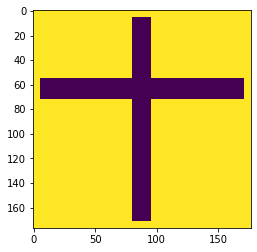

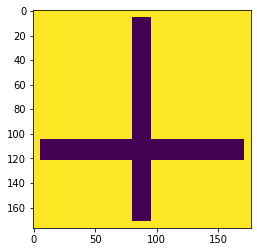

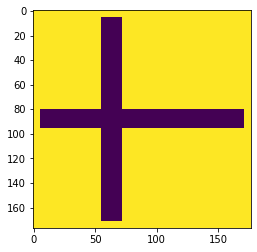

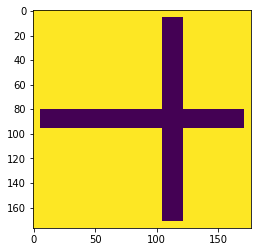

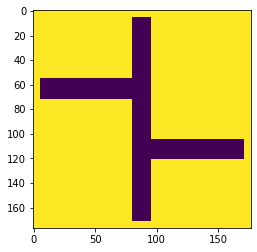

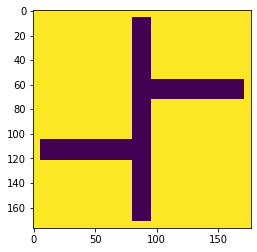

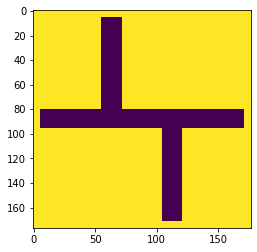

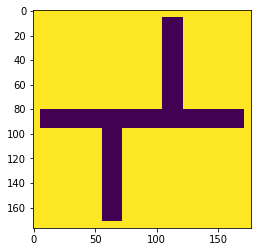

In [5]:
i = 0
for img in cross+non_cross:
    plt.figure(i)
    plt.imshow(img)
    i += 1

In [6]:
img.shape[0]/32

5.53125

In [7]:
# cross in non_crosses
for i in range(len(num_items)):
    for n in range(1, num_stimuli_per_case+1):
        stim_img, tar_img, gt_img = gen_stimuli(num_items[i], non_cross, cross)
            
        file_name = str(i*num_stimuli_per_case + n) + ".jpg"
        cv2.imwrite("intersection/cross/stimuli/" + file_name, stim_img)
        cv2.imwrite("intersection/cross/target/" + file_name, tar_img)
        cv2.imwrite("intersection/cross/gt/" + file_name, gt_img)

# non_cross in crosses
for i in range(len(num_items)):
    for n in range(1, num_stimuli_per_case+1):
        stim_img, tar_img, gt_img = gen_stimuli(num_items[i], cross, non_cross)
            
        file_name = str(i*num_stimuli_per_case + n) + ".jpg"
        cv2.imwrite("intersection/non_cross/stimuli/" + file_name, stim_img)
        cv2.imwrite("intersection/non_cross/target/" + file_name, tar_img)
        cv2.imwrite("intersection/non_cross/gt/" + file_name, gt_img)

## T and L

In [8]:
try:
    os.makedirs("intersection/Ls/stimuli/", exist_ok = True)
    os.makedirs("intersection/Ls/target/", exist_ok = True)
    os.makedirs("intersection/Ls/gt/", exist_ok = True)
    os.makedirs("intersection/Ts/stimuli/", exist_ok = True)
    os.makedirs("intersection/Ts/target/", exist_ok = True)
    os.makedirs("intersection/Ts/gt/", exist_ok = True)
except:
    pass

In [9]:
temp = np.uint8(255*np.ones((int((line_height)*deg2px), int((line_width)*deg2px))))
temp[:, :int(line_weight*deg2px)] = 0
temp[int((line_height-line_weight)*deg2px):int((line_height)*deg2px), :] = 0
temp2 = np.uint8(255*np.ones((int((line_height+border)*deg2px), int((line_width+border)*deg2px))))
temp2[int((border/2)*deg2px):int((border/2)*deg2px)+int((line_height)*deg2px), int((border/2)*deg2px):int((border/2)*deg2px)+int((line_height)*deg2px)] = np.copy(temp)
temp = np.copy(temp2)

Ls = []
Ls.append(temp)
Ls.append(cv2.flip(temp, 0))
Ls.append(temp.T)
Ls.append(cv2.flip(temp.T, 1))

temp = np.uint8(255*np.ones((int((line_height)*deg2px), int((line_width)*deg2px))))
temp[:,int((line_width-line_weight)*deg2px/2):int((line_width+line_weight)*deg2px/2)] = 0
temp[:int((line_weight)*deg2px), :] = 0
temp2 = np.uint8(255*np.ones((int((line_height+border)*deg2px), int((line_width+border)*deg2px))))
temp2[int((border/2)*deg2px):int((border/2)*deg2px)+int((line_height)*deg2px), int((border/2)*deg2px):int((border/2)*deg2px)+int((line_height)*deg2px)] = np.copy(temp)
temp = np.copy(temp2)

Ts = []
Ts.append(temp)
Ts.append(cv2.flip(temp, 0))
Ts.append(temp.T)
Ts.append(cv2.flip(temp.T, 1))

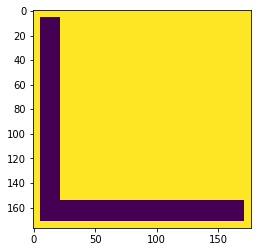

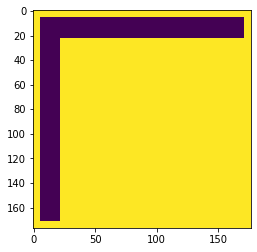

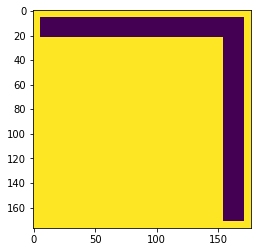

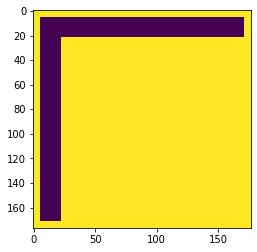

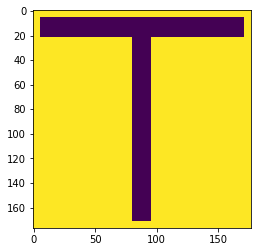

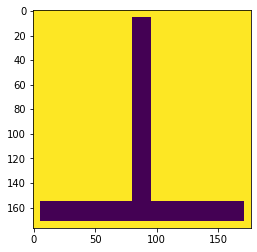

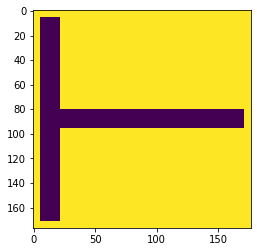

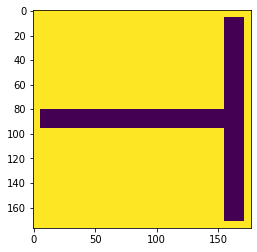

In [10]:
i = 0
for img in Ls+Ts:
    plt.figure(i)
    plt.imshow(img)
    i += 1

In [11]:
# L in Ts
for i in range(len(num_items)):
    for n in range(1, num_stimuli_per_case+1):
        stim_img, tar_img, gt_img = gen_stimuli(num_items[i], Ts, Ls)
            
        file_name = str(i*num_stimuli_per_case + n) + ".jpg"
        cv2.imwrite("intersection/Ls/stimuli/" + file_name, stim_img)
        cv2.imwrite("intersection/Ls/target/" + file_name, tar_img)
        cv2.imwrite("intersection/Ls/gt/" + file_name, gt_img)

# T in Ls
for i in range(len(num_items)):
    for n in range(1, num_stimuli_per_case+1):
        stim_img, tar_img, gt_img = gen_stimuli(num_items[i], Ls, Ts)
            
        file_name = str(i*num_stimuli_per_case + n) + ".jpg"
        cv2.imwrite("intersection/Ts/stimuli/" + file_name, stim_img)
        cv2.imwrite("intersection/Ts/target/" + file_name, tar_img)
        cv2.imwrite("intersection/Ts/gt/" + file_name, gt_img)

In [22]:
img.shape

(180, 180)

In [71]:
159/32

4.96875